In [1]:
import sys
sys.path.append('../src')
from datetime import datetime
from preprocess import preprocess
from functions import random_points_in_circle, plot_particle_tracking

### Tracing Period

In [2]:
start = datetime(2023, 7, 2, 6)
end = datetime(2023, 7, 3, 6)

### Lake Selection
["ageri", "biel", "caldonazzo", "garda", "geneva", "greifensee",
 "hallwil", "joux", "lugano", "murten", "stmoritz", "zurich"]

In [3]:
lake = "hallwil"

### Run ID

In [4]:
run_id = "testing"

### Generate Particles

In [5]:
particles = random_points_in_circle(658735, 237277, 100, 10000, 0.5, 10)

### Preprocess inputs
This section generates the necessary input files to run ctracker

In [6]:
out = preprocess(run_id, lake, start, end, particles)

## Run ctracker


```
conda activate ctracker
cd ctracker
python run.py "working_dir"
```

### Plot results

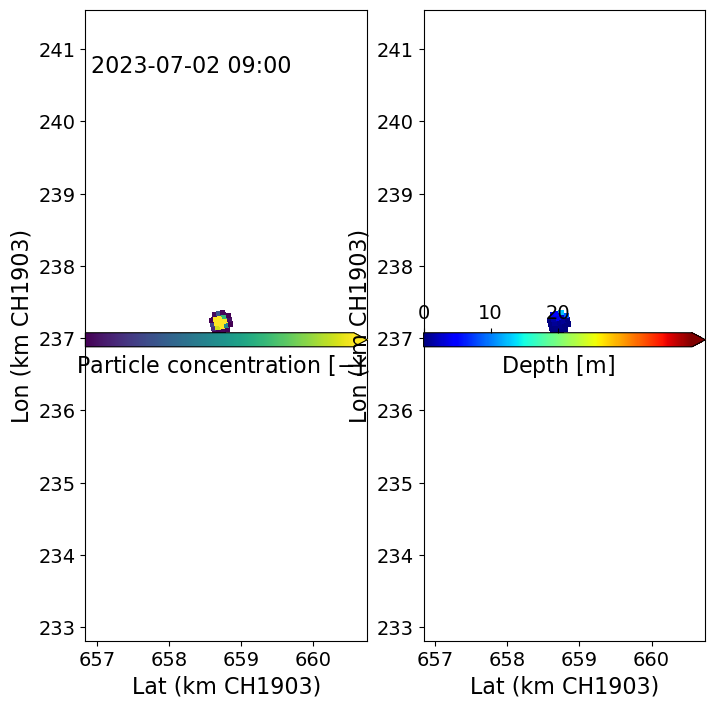

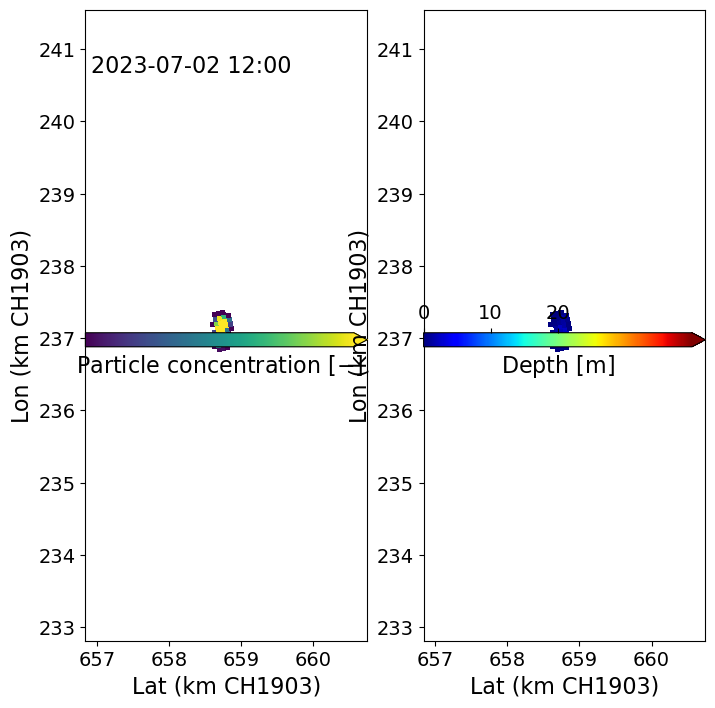

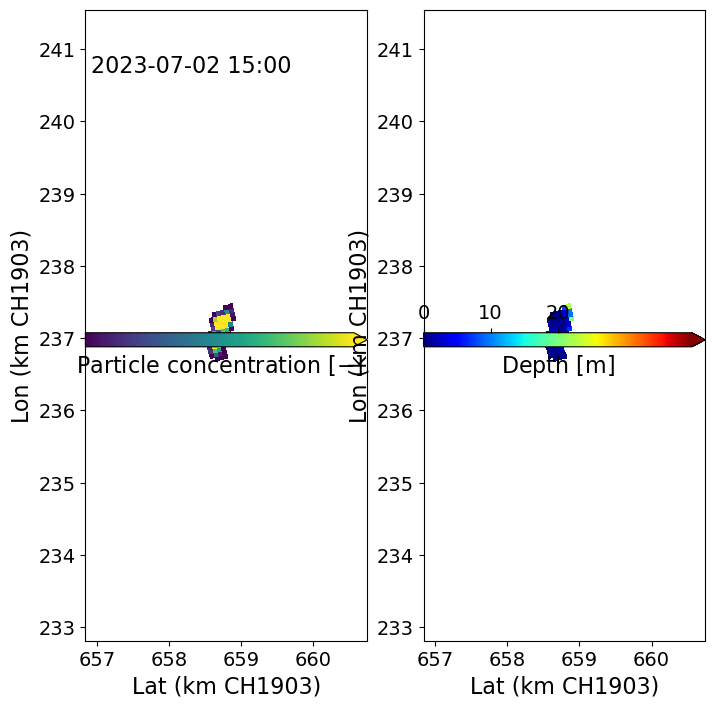

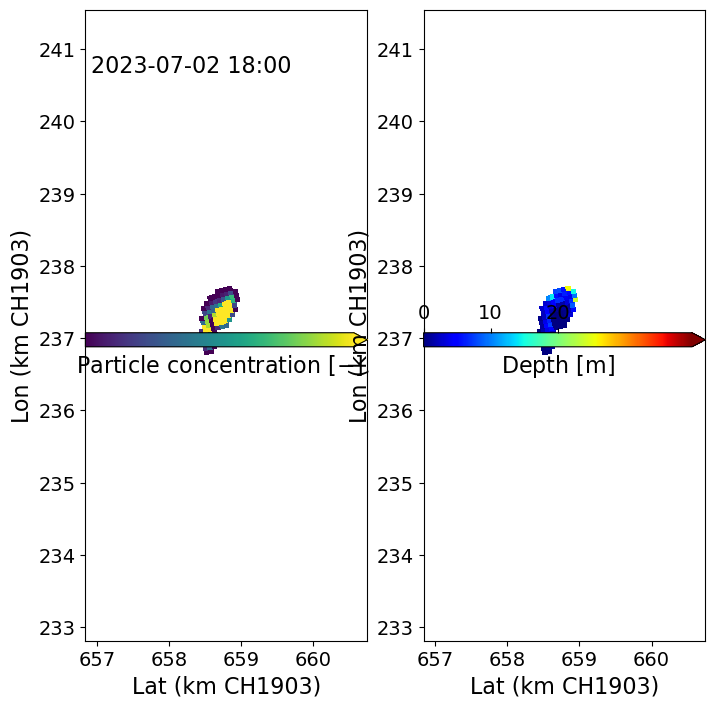

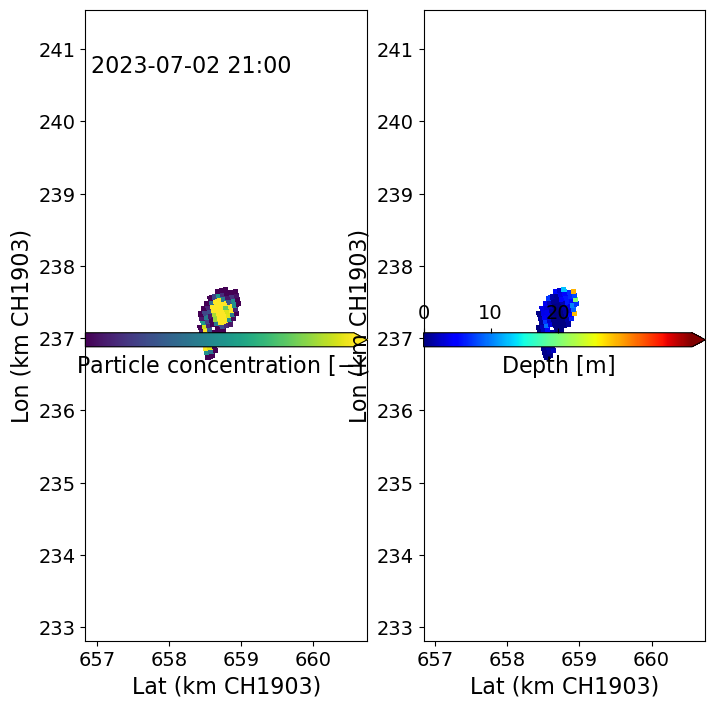

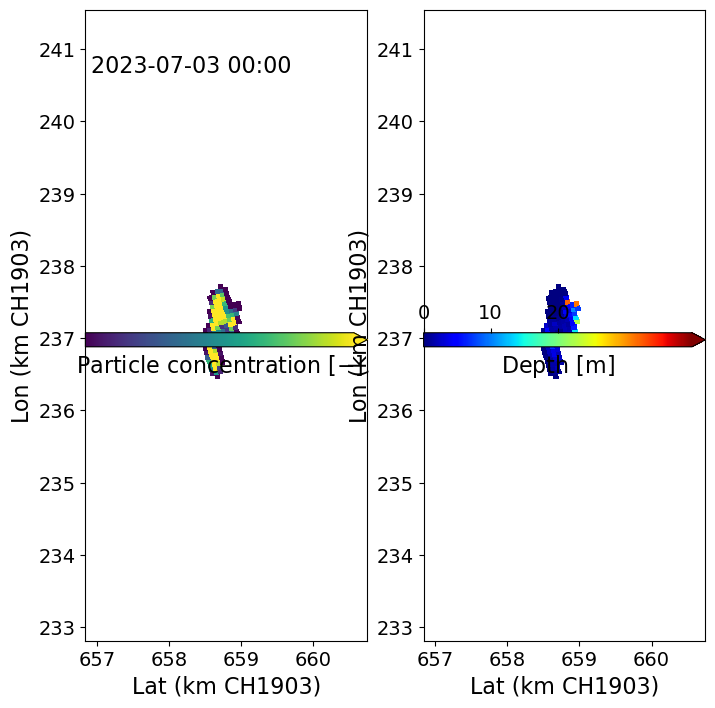

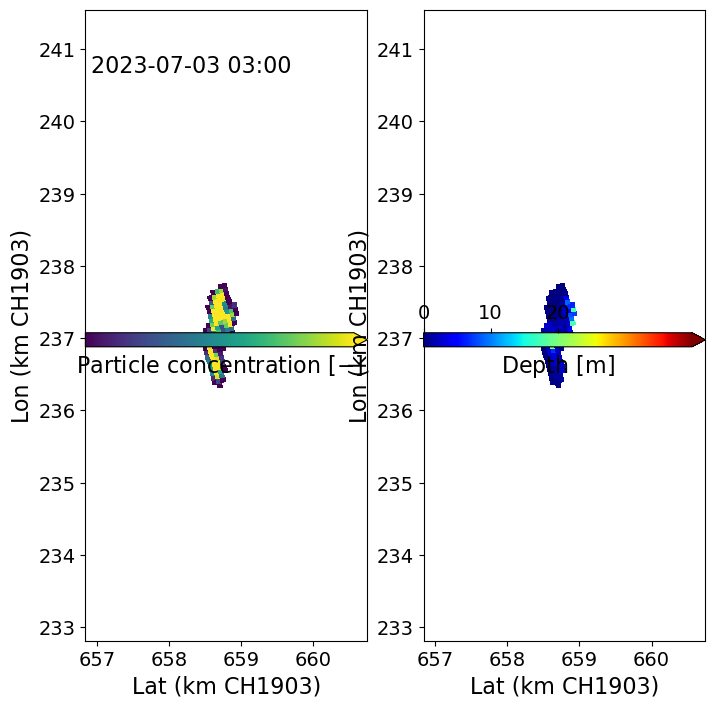

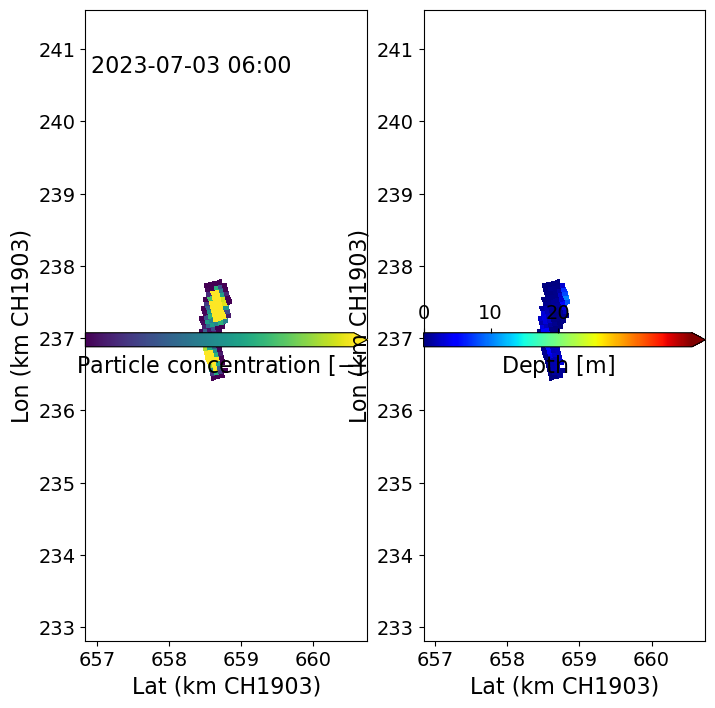

In [7]:
plot_particle_tracking(out["working_dir"], out["x0"], out["y0"], out["x1"], out["y1"])